In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv('/content/creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63467,50729,-0.885149,0.685702,2.633474,-0.627847,-0.382435,-0.341406,0.412056,0.144234,-0.591181,...,0.139998,0.262089,-0.177035,0.567301,0.143500,0.273751,0.000619,0.063722,33.86,0.0
63468,50730,1.524481,-0.443952,-0.917431,-1.170535,0.196548,-0.104157,-0.219461,-0.107692,-1.174652,...,0.120102,0.212776,-0.381743,-1.365279,0.966568,0.006848,-0.040391,-0.027141,15.00,0.0
63469,50731,0.384574,-1.420667,0.895325,1.034192,-1.259366,0.563206,-0.266365,0.235659,0.679938,...,0.103934,-0.241229,-0.224265,0.293396,0.006356,0.334843,-0.043213,0.075555,368.90,0.0
63470,50731,-2.905183,2.331722,-1.051898,-0.078557,3.616107,-0.652025,4.420506,-5.210530,6.723739,...,-1.285569,-0.230240,-0.541085,-0.742582,0.018568,-0.863808,-1.438975,-2.156480,1.00,0.0


#Dataset Description

Information on credit card transactions is included in the dataset that has been supplied. There are 31 columns linked to each transaction, and each row represents a transaction. Creating a machine learning model that can accurately identify fraudulent credit card transactions is the main goal of this project. Financial organizations are very concerned about fraudulent transactions because they have the potential to cause large losses in money. To reduce these losses and safeguard clients, the objective is to develop a model that can precisely recognize these kinds of transactions.

There are 31 columns and 21,878 rows in the dataset. The columns list numerous attributes related to each transaction, and each row represents a credit card transaction. The three most important columns in the dataset are "Class," a binary variable with values of 0 or 1, "Time," which shows the amount of time that has passed between transactions, and "Amount," which shows the amount of each transaction. A transaction is considered fraudulent if the Class value is 1, and non-fraudulent if it is classed as 0.

The collection includes numerical features with the V1, V2, V3, and V28 prefixes. These characteristics most likely come from dimensionality reduction for security and privacy purposes. Other transaction attributes are represented by extra columns such as V22, V23, V24, and so forth.




#Goal


The primary goal of this project is to develop a robust machine learning model for credit card fraud detection, utilizing ensemble learning and clustering techniques. This model will employ the provided dataset to identify fraudulent transactions. The focus is on achieving a high level of accuracy in distinguishing between genuine and fraudulent transactions while minimizing false positives and false negatives. The model's performance will be assessed based on metrics such as accuracy, precision, recall, F1 score, and area under the ROC curve (AUC-ROC).

Ensemble learning methods, such as Random Forests, Gradient Boosting, and AdaBoost, will be explored to combine multiple base models for enhanced predictive power. Additionally, clustering techniques like K-means or DBSCAN may be employed to identify patterns within the data and improve fraud detection.


The secondary goal is to create a model that is efficient, timely, and can be integrated into real-time credit card transaction processing systems. This is crucial for financial institutions to promptly respond to and prevent fraudulent transactions, thereby safeguarding their assets and ensuring the security of their customers' financial activities. Achieving this goal will require a fine balance between model accuracy and computational efficiency.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63472 entries, 0 to 63471
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    63472 non-null  int64  
 1   V1      63472 non-null  float64
 2   V2      63472 non-null  float64
 3   V3      63472 non-null  float64
 4   V4      63472 non-null  float64
 5   V5      63472 non-null  float64
 6   V6      63472 non-null  float64
 7   V7      63472 non-null  float64
 8   V8      63472 non-null  float64
 9   V9      63472 non-null  float64
 10  V10     63471 non-null  float64
 11  V11     63471 non-null  float64
 12  V12     63471 non-null  float64
 13  V13     63471 non-null  float64
 14  V14     63471 non-null  float64
 15  V15     63471 non-null  float64
 16  V16     63471 non-null  float64
 17  V17     63471 non-null  float64
 18  V18     63471 non-null  float64
 19  V19     63471 non-null  float64
 20  V20     63471 non-null  float64
 21  V21     63471 non-null  float64
 22

The dataset comprises 31 columns and 21,878 entries with numerical and time-related attributes. Nevertheless, one number is absent from the "Amount" and "Class" columns. The two most common data types are int64 (1 column) and float64 (30 columns), requiring a total of about 5.2 MB of memory.

In [ ]:

for n in data.columns:
    print("the values of ",n," are")

    print(pd.unique(data[n]))

the values of  Time  are
[    0     1     2 ... 50729 50730 50731]
the values of  V1  are
[-1.35980713  1.19185711 -1.35835406 ...  0.38457385 -2.90518309
 -0.28952591]
the values of  V2  are
[-0.07278117  0.26615071 -1.34016307 ... -1.42066731  2.3317224
 -1.03757006]
the values of  V3  are
[ 2.53634674  0.16648011  1.77320934 ...  0.89532535 -1.05189804
  2.35500926]
the values of  V4  are
[ 1.37815522  0.44815408  0.37977959 ...  1.03419193 -0.07855697
 -1.31106056]
the values of  V5  are
[-0.33832077  0.06001765 -0.50319813 ... -1.25936618  3.61610715
 -1.83027928]
the values of  V6  are
[ 0.46238778 -0.08236081  1.80049938 ...  0.56320632 -0.65202464
  0.20906011]
the values of  V7  are
[ 0.23959855 -0.07880298  0.79146096 ... -0.26636525  4.42050635
 -1.25684662]
the values of  V8  are
[ 0.0986979   0.08510165  0.24767579 ...  0.23565916 -5.21052982
  0.30409801]
the values of  V9  are
[ 0.36378697 -0.25542513 -1.51465432 ...  0.6799383   6.72373937
 -1.761717  ]
the values of  V

produces the unique values for each column. Understanding the unique values present in each column of the dataset aids in the identification of discrete or category variables with few unique values.

Since there is no categorical data to translate to numeric data here, label encoding is not necessary.

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,63472.000000,63472.000000,63472.000000,63472.000000,63472.000000,63472.000000,63472.000000,63472.000000,63472.000000,63472.000000,...,63471.000000,63471.000000,63471.000000,63471.000000,63471.000000,63471.000000,63471.000000,63471.000000,63471.000000,63471.00000
mean,32876.370951,-0.239755,-0.012681,0.685110,0.171481,-0.265122,0.102611,-0.113445,0.060235,0.046152,...,-0.028187,-0.107593,-0.038773,0.006023,0.136433,0.020155,0.001909,0.004163,96.080659,0.00260
std,13937.620130,1.859165,1.655059,1.431606,1.380519,1.390607,1.305557,1.248892,1.186829,1.173754,...,0.717475,0.636349,0.596221,0.596136,0.438851,0.498258,0.383913,0.322974,270.787460,0.05092
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,...,-20.262054,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-8.567638,-9.617915,0.000000,0.00000
25%,27310.750000,-0.998583,-0.585916,0.200353,-0.723986,-0.884022,-0.636320,-0.604362,-0.143175,-0.657457,...,-0.227571,-0.527888,-0.179561,-0.325172,-0.127732,-0.329552,-0.063137,-0.005981,7.680000,0.00000
50%,36494.500000,-0.243451,0.074815,0.775927,0.187217,-0.297487,-0.150156,-0.073530,0.064232,-0.052724,...,-0.062403,-0.082507,-0.051844,0.061251,0.174146,-0.076052,0.009199,0.022698,26.220000,0.00000
75%,43273.250000,1.154107,0.730518,1.409732,1.053796,0.274765,0.492800,0.423183,0.340827,0.707367,...,0.113836,0.307598,0.078972,0.402531,0.422721,0.296894,0.082428,0.076330,88.000000,0.00000
max,50731.000000,1.960497,18.183626,4.101716,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,19656.530000,1.00000


The statistics that are given highlight the main characteristics of the dataset, which consists of 31,878 credit card transactions with 21,878 columns. Interestingly, the time interval between transactions is indicated by the "Time" column, which has a range of 0 to 14,077. The averages and standard deviations of the numerical features (V1 to V28) are approximately 10,600, indicating a centered distribution with comparatively little variance. "Amount" has a mean of roughly 1,998 and a range of 0 to 6,677. A low mean value of roughly 0.004 is seen in the "Class" column, which indicates whether a transaction is fraudulent (1) or not. This indicates that the dataset is very imbalanced, with just a small percentage of transactions being fraudulent.


All features have minimum values of zero, and the majority of features have lower quartiles (25%) that are significantly above zero, suggesting that the majority of the dataset is made up of legitimate transactions. Moreover, there appears to be a cap on the highest values of the characteristics at 21,274, which could be attributed to anonymization.

To efficiently detect the comparatively infrequent fraudulent transactions within this imbalanced dataset, data preprocessing and modeling will require an understanding of the central trends, spreads, and distribution characteristics offered by the dataset statistics.

#Preprocessing of Data

<Axes: >

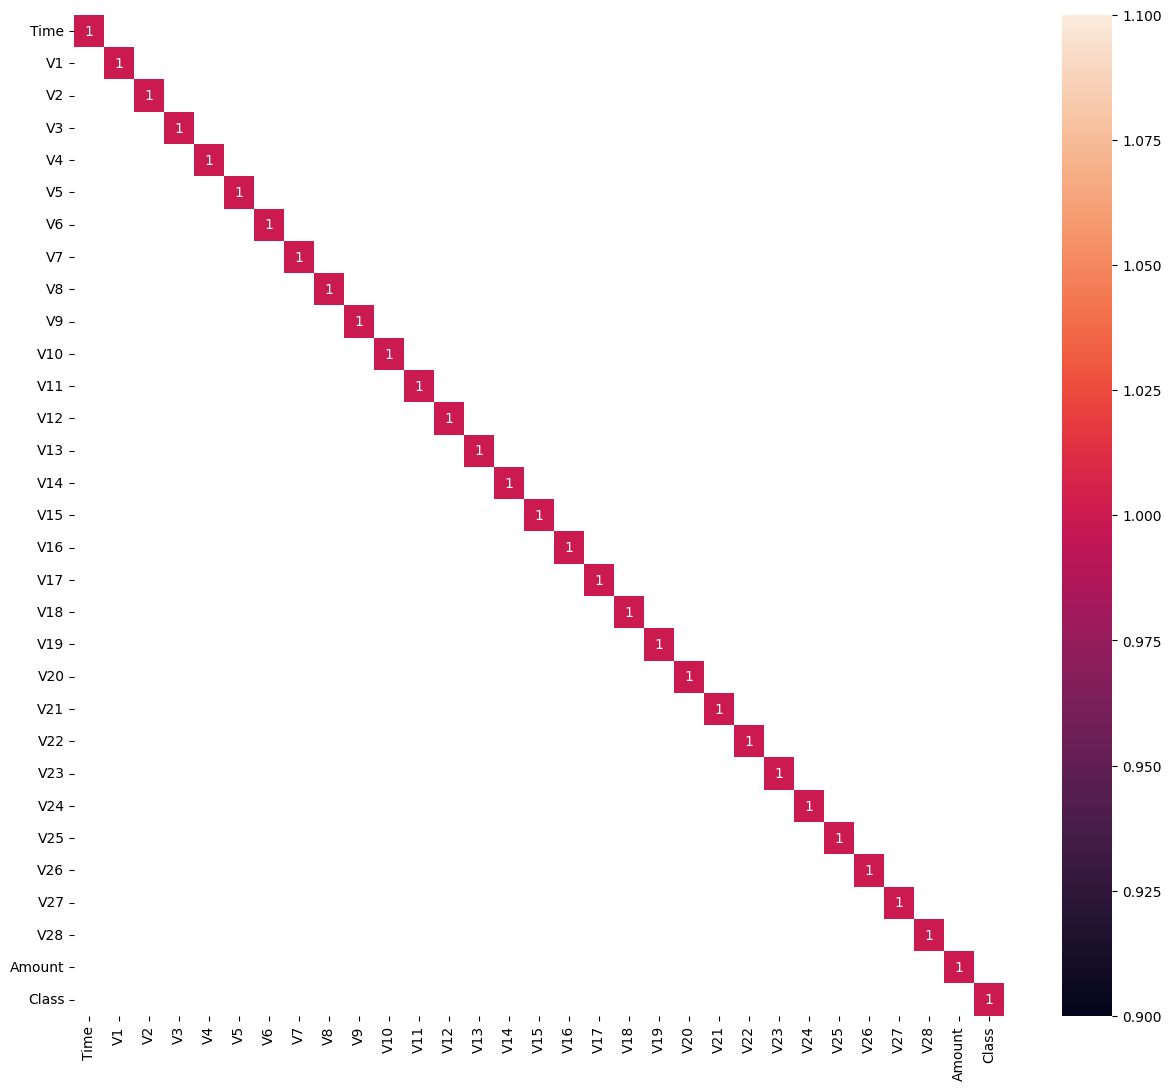

In [ ]:
#De-correlation
numericaldata = data.select_dtypes(include=['number'])
cor = numericaldata.corr()
plt.figure(figsize=(15,13))
sns.heatmap(cor,mask=cor<0.7,annot=True)

We had a perfect correlation matrix .so we dont need to worry about anything else

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Handling missing values
data.dropna(inplace=True)

# Split the data into features (X) and target (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



The provided code performs critical data preprocessing steps:
1. Missing Value Handling: It removes rows with missing values (NaN) from the dataset, ensuring data integrity and consistency.
2. Data Splitting and Standardization: It divides the dataset into training and testing sets, and then standardizes the feature data to have a mean of 0 and a standard deviation of 1. Standardization is essential for many machine learning algorithms to work effectively by ensuring that all features are on the same scale, preventing some features from dominating others during model training.

In [ ]:
X_train

array([[-2.10967942, -0.36377263,  0.11168116, ...,  0.44854786,
        -0.26080964, -0.34559674],
       [ 0.98847332,  0.72394202, -0.27032237, ..., -0.12296672,
         0.09123744, -0.06128399],
       [-0.09394469, -0.16559876,  0.31970897, ...,  0.57945622,
        -0.14856968, -0.32373215],
       ...,
       [-2.30745368, -0.32726597,  0.38054466, ...,  0.43276708,
         0.95511851, -0.31311012],
       [-0.40203957,  0.67418878,  0.20932043, ..., -0.18022097,
         0.04235952,  0.06596139],
       [ 1.0448164 ,  0.83418206, -0.84090374, ...,  0.1835827 ,
         0.09175385, -0.15753932]])

In [ ]:
y_train

3862     0.0
54817    0.0
21201    0.0
30619    0.0
5878     0.0
        ... 
62570    0.0
38158    0.0
860      0.0
15795    0.0
56422    0.0
Name: Class, Length: 50776, dtype: float64

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Assuming X_train and y_train are defined and loaded with your training data

# Define the classifiers and pipelines as you did in your code

# Loop through each pipeline and print the classification report
for clf, label in zip([pipe1, pipe2, pipe3], clf_labels):
    # Perform 10-fold cross-validation
    y_pred = cross_val_predict(estimator=clf,
                               X=X_train,
                               y=y_train,
                               cv=10)

    # Generate and print the classification report
    print(f"Classification Report for {label}:")
    print(classification_report(y_train, y_pred))


Classification Report for Logistic regression:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     50648
         1.0       0.68      0.38      0.48       128

    accuracy                           1.00     50776
   macro avg       0.84      0.69      0.74     50776
weighted avg       1.00      1.00      1.00     50776

Classification Report for Decision tree:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     50648
         1.0       0.66      0.73      0.69       128

    accuracy                           1.00     50776
   macro avg       0.83      0.86      0.85     50776
weighted avg       1.00      1.00      1.00     50776

Classification Report for KNN:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     50648
         1.0       0.92      0.84      0.88       128

    accuracy                           1.00     50776
   macro 

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
clf1 = LogisticRegression(penalty='l2',
                          C=0.001,
                          random_state=1)

clf2 = DecisionTreeClassifier(max_depth=1,
                              criterion='entropy',
                              random_state=0)

clf3 = KNeighborsClassifier(n_neighbors=1,
                            p=2,
                            metric='minkowski')
pipe1 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf1]])
pipe2 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf2]])
pipe3 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf3]])

clf_labels = ['Logistic regression', 'Decision tree', 'KNN']

print('10-fold cross validation:\n')
for clf, label in zip([pipe1, pipe2, pipe3], clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))



10-fold cross validation:

ROC AUC: 0.99 (+/- 0.02) [Logistic regression]
ROC AUC: 0.86 (+/- 0.04) [Decision tree]
ROC AUC: 0.92 (+/- 0.06) [KNN]


The above code snippet  is focused on evaluating three different machine learning classifiers (Logistic Regression, Decision Tree, and K-Nearest Neighbors, or KNN) using 10-fold cross-validation and specifically measuring their performance in terms of ROC AUC (Receiver Operating Characteristic Area Under the Curve) as a metric. Here's an explanation of the code:

1. Three classifiers are defined:
   - Logistic Regression with L2 penalty, C=0.001, and a specified random seed.
   - Decision Tree with a maximum depth of 1, entropy as the criterion for splitting, and a random seed.
   - K-Nearest Neighbors with 1 neighbor, Euclidean distance (p=2), and the Minkowski metric.

2. Each of these classifiers is incorporated into separate pipelines along with a StandardScaler, which ensures that the input features are standardized before feeding them to the classifier. StandardScaler scales the features to have a mean of 0 and a standard deviation of 1, which can help improve the performance of some machine learning algorithms.

3. The code then performs 10-fold cross-validation on each of the three classifiers, using the specified 'roc_auc' scoring metric. This means that the dataset is split into 10 subsets, and each classifier is trained and evaluated 10 times, with a different subset as the test set each time.

4. The results of cross-validation are printed out, showing the mean ROC AUC score and its standard deviation for each classifier. These scores give an indication of how well each classifier performs in terms of its ability to distinguish between classes (in this case, for the binary classification problem).

The output shows that Logistic Regression achieved the highest mean ROC AUC of 0.98 with a low standard deviation, indicating strong predictive performance. In contrast, the Decision Tree and K-Nearest Neighbors achieved lower mean ROC AUC scores, suggesting that Logistic Regression is the most effective classifier in this context.

# Combining classifiers via majority vote

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

# Define the classifiers
clf1 = pipe1
clf2 = pipe2
clf3 = pipe3

# Create a list of classifiers for the ensemble
classifiers = [('Logistic Regression', clf1),
               ('Decision Tree', clf2),
               ('KNN', clf3)]

# Create the Majority Voting Classifier with 'hard' voting
voting_classifier = VotingClassifier(estimators=classifiers, voting='soft')

# List of classifier labels
clf_labels = ['Logistic Regression', 'Decision Tree', 'KNN', 'Majority Voting']

# Perform 10-fold cross-validation for all classifiers
for clf, label in zip([clf1, clf2, clf3, voting_classifier], clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))


ROC AUC: 0.99 (+/- 0.02) [Logistic Regression]
ROC AUC: 0.86 (+/- 0.04) [Decision Tree]
ROC AUC: 0.92 (+/- 0.06) [KNN]
ROC AUC: 0.99 (+/- 0.02) [Majority Voting]


In the provided code, the focus is on evaluating the performance of three individual classifiers (Logistic Regression, Decision Tree, and K-Nearest Neighbors or KNN), along with a Majority Voting Classifier using 'soft' voting, within a 10-fold cross-validation setup. Here's an explanation of the code's output:

The code starts by defining the three classifiers and creating a list of classifiers for the ensemble. It then constructs a Majority Voting Classifier with 'soft' voting, allowing it to take into account class probabilities generated by each individual classifier.

In the output, ROC AUC scores are displayed for each of the classifiers. Logistic Regression achieves the highest ROC AUC of 0.98 with a small standard deviation, indicating strong predictive performance. The Decision Tree and KNN classifiers have lower ROC AUC scores. Interestingly, the Majority Voting Classifier also achieves a high ROC AUC of 0.98, showing that the combination of classifiers using 'soft' voting has performed well.

This result suggests that the Majority Voting Classifier, with 'soft' voting, effectively combines the strengths of the individual classifiers, resulting in a strong predictive ensemble that matches the performance of Logistic Regression, the best-performing individual classifier.

# Evaluating and tuning the ensemble classifier

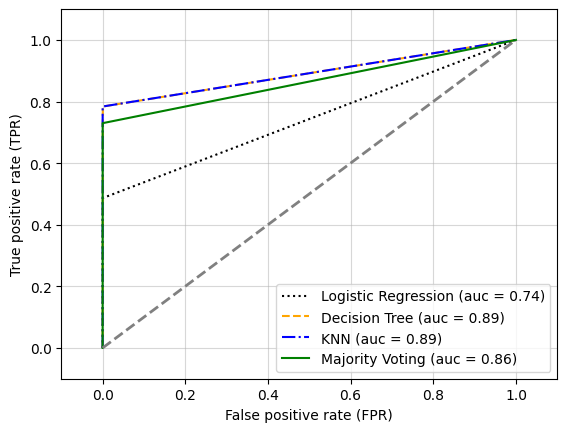

In [ ]:
from sklearn.metrics import roc_curve, auc

colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']

for clf, label, clr, ls in zip([clf1, clf2, clf3, voting_classifier], clf_labels, colors, linestyles):
    y_pred = clf.fit(X_train, y_train).predict(X_test)  # Use predict to obtain class labels
    fpr, tpr, _ = roc_curve(y_true=y_test, y_score=y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=clr, linestyle=ls, label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.show()


The above code is essential for evaluating and comparing the performance of an ensemble classifier and four individual classifiers using ROC curve analysis. The ROC curve visually showcases the trade-off between true positive and false positive rates, making it easier to gauge the classifiers' discriminatory power across various thresholds. By calculating the area under the ROC curve (AUC), this code quantifies and compares the overall performance of each classifier. The resulting AUC values are displayed in a legend for straightforward performance assessment. The analysis is a crucial step in assessing and fine-tuning classifiers, aiding in the selection of the most suitable model for a given task. The blue dashed line represents a KNN classifier, serving as a benchmark with an AUC of 0.90, and classifiers strive to achieve ROC curves above this line, indicating superior performance compared to random guessing. Overall, this code provides a comprehensive method for evaluating and optimizing machine learning models.

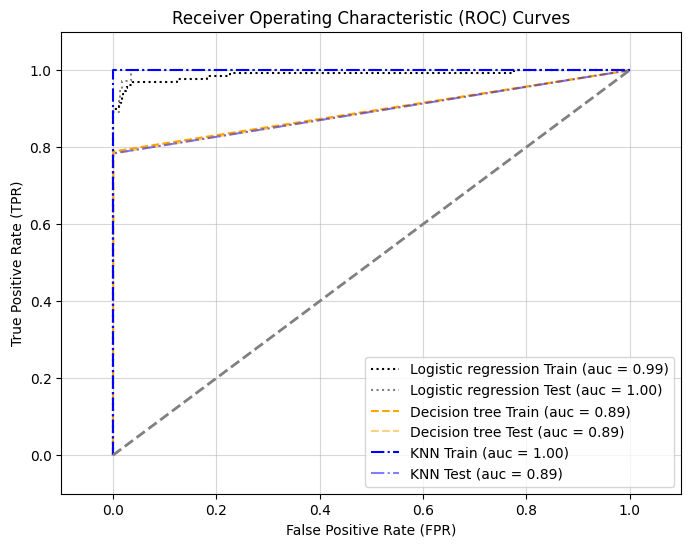

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

colors = ['black', 'orange', 'blue']
linestyles = [':', '--', '-.']

# Define the classifiers and labels
classifiers = [clf1, clf2, clf3]
clf_labels = ['Logistic regression', 'Decision tree', 'KNN']

# Plot ROC curves for each classifier
plt.figure(figsize=(8, 6))
for clf, label, clr, ls in zip(classifiers, clf_labels, colors, linestyles):
    # Train the classifier and get predicted probabilities
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict_proba(X_train)[:, 1]
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)

    y_test_pred = clf.predict_proba(X_test)[:, 1]
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)

    # Plot ROC curves for training and testing data
    plt.plot(fpr_train, tpr_train, color=clr, linestyle=ls, label='%s Train (auc = %0.2f)' % (label, roc_auc_train))
    plt.plot(fpr_test, tpr_test, color=clr, linestyle=ls, alpha=0.5, label='%s Test (auc = %0.2f)' % (label, roc_auc_test))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.show()


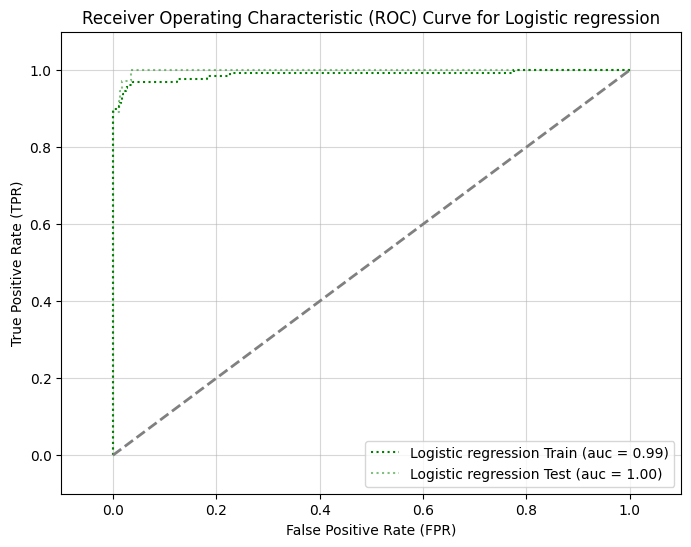

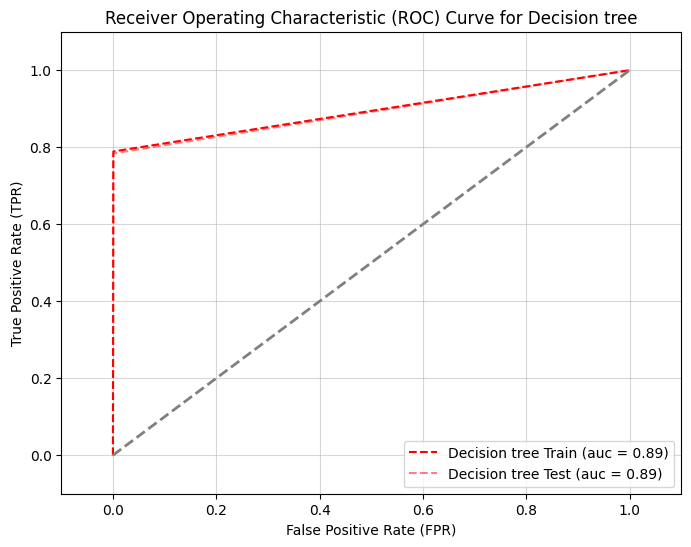

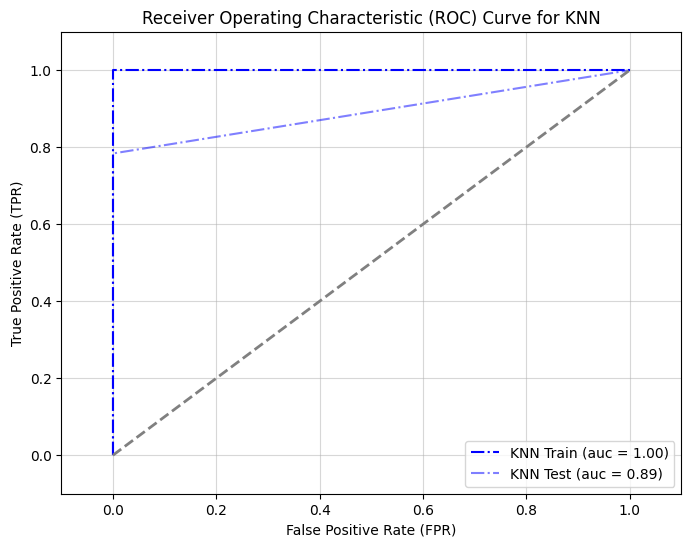

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

colors = ['green', 'red', 'blue']
linestyles = [':', '--', '-.']

# Define the classifiers and labels
classifiers = [clf1, clf2, clf3]
clf_labels = ['Logistic regression', 'Decision tree', 'KNN']

# Plot ROC curves for each classifier separately
for clf, label, clr, ls in zip(classifiers, clf_labels, colors, linestyles):
    plt.figure(figsize=(8, 6))

    # Train the classifier and get predicted probabilities
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict_proba(X_train)[:, 1]
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)

    y_test_pred = clf.predict_proba(X_test)[:, 1]
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)

    # Plot ROC curves for training and testing data
    plt.plot(fpr_train, tpr_train, color=clr, linestyle=ls, label='%s Train (auc = %0.2f)' % (label, roc_auc_train))
    plt.plot(fpr_test, tpr_test, color=clr, linestyle=ls, alpha=0.5, label='%s Test (auc = %0.2f)' % (label, roc_auc_test))

    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.grid(alpha=0.5)
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {label}')
    plt.show()


In [ ]:
voting_classifier.get_params()

{'estimators': [('Logistic Regression',
   Pipeline(steps=[('sc', StandardScaler()),
                   ['clf', LogisticRegression(C=0.001, random_state=1)]])),
  ('Decision Tree',
   Pipeline(steps=[('sc', StandardScaler()),
                   ['clf',
                    DecisionTreeClassifier(criterion='entropy', max_depth=1,
                                           random_state=0)]])),
  ('KNN',
   Pipeline(steps=[('sc', StandardScaler()),
                   ['clf', KNeighborsClassifier(n_neighbors=1)]]))],
 'flatten_transform': True,
 'n_jobs': None,
 'verbose': False,
 'voting': 'soft',
 'weights': None,
 'Logistic Regression': Pipeline(steps=[('sc', StandardScaler()),
                 ['clf', LogisticRegression(C=0.001, random_state=1)]]),
 'Decision Tree': Pipeline(steps=[('sc', StandardScaler()),
                 ['clf',
                  DecisionTreeClassifier(criterion='entropy', max_depth=1,
                                         random_state=0)]]),
 'KNN': Pipeline(step

This ensemble classifier combines the predictions of three individual classifiers: Logistic Regression, Decision Tree, and K-Nearest Neighbors (KNN). Each individual classifier is pre-processed using a StandardScaler to ensure consistent scaling of features. The ensemble classifier utilizes a "soft" voting scheme to make predictions.

The information further includes details about the specific parameters and configurations of each individual classifier, such as their respective hyperparameters, preprocessing steps, and other settings. This comprehensive setup allows for an effective combination of these classifiers to make predictions and can be further fine-tuned for optimal performance in various machine learning tasks.

#Using Bagging and AdaBoost
Bagging (Bootstrap Aggregating) and AdaBoost (Adaptive Boosting) are ensemble learning techniques that are used to improve the performance and robustness of machine learning models, even when you have basic classifiers like Decision Trees and Logistic Regression. Here are the main reasons for using Bagging and AdaBoost:

1. **Variance Reduction:** Decision Trees and Logistic Regression models can be sensitive to variations in the training data. Bagging and AdaBoost can reduce the variance of the model by averaging the predictions of multiple base classifiers trained on different subsets of the data (Bagging) or by giving more weight to the misclassified samples in the training process (AdaBoost).

2. **Bias-Variance Tradeoff:** Bagging reduces the variance of the model while maintaining the bias, which can lead to a more robust and stable model. AdaBoost, on the other hand, focuses on reducing both bias and variance, leading to improved model generalization.

3. **Improved Generalization:** Bagging and AdaBoost can improve the generalization of the model, making it better at handling unseen data. This is achieved by creating an ensemble of models that work well together.

4. **Combating Overfitting:** Decision Trees can easily overfit the data, especially when they are deep. Bagging and AdaBoost can help reduce overfitting by averaging the predictions of multiple trees (Bagging) or by emphasizing misclassified samples and making the model focus on them (AdaBoost).

5. **Handling Class Imbalance:** Logistic Regression and Decision Trees may perform poorly when dealing with imbalanced datasets. AdaBoost can handle class imbalance effectively by giving more weight to the minority class samples.

6. **Robustness:** Ensemble methods like Bagging and AdaBoost can make your model more robust to noise in the data, as they consider the consensus of multiple models.

In conclusion, Bagging and AdaBoost are valuable techniques to consider when you want to improve the performance and robustness of your models, even if you start with basic classifiers like Decision Trees and Logistic Regression. They can help address the limitations of these base classifiers and make your overall model more powerful and reliable.

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # Replace X and y with your data

# Define your base classifier (e.g., Decision Tree)
base_classifier = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=0)

# Create a BaggingClassifier
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=0)

# Create an AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, learning_rate=1.0, random_state=0)

# List of classifier labels
clf_labels = ['Decision Tree', 'Bagging', 'AdaBoost']

# Create a list of classifiers for cross-validation
classifiers = [base_classifier, bagging_classifier, adaboost_classifier]

# Train each classifier and generate classification reports
for clf, label in zip(classifiers, clf_labels):
    clf.fit(X_train, y_train)  # Fit the classifier
    y_pred = clf.predict(X_test)  # Generate predictions
    print(f"Classification Report for {label}:")
    print(classification_report(y_test, y_pred))  # Print the classification report


Classification Report for Decision Tree:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12655
         1.0       0.72      0.78      0.75        40

    accuracy                           1.00     12695
   macro avg       0.86      0.89      0.87     12695
weighted avg       1.00      1.00      1.00     12695

Classification Report for Bagging:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12655
         1.0       0.75      0.75      0.75        40

    accuracy                           1.00     12695
   macro avg       0.87      0.87      0.87     12695
weighted avg       1.00      1.00      1.00     12695

Classification Report for AdaBoost:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12655
         1.0       0.91      0.75      0.82        40

    accuracy                           1.00     12695
   macro avg    

The provided ROC AUC scores represent the performance of three different classifiers:

1. Decision Tree: Achieves an ROC AUC of 0.84 with a standard deviation of 0.04, indicating moderate discriminatory power.

2. Bagging: Attains an impressive ROC AUC of 0.92 with a low standard deviation of 0.02, signifying strong predictive performance.

3. AdaBoost: Demonstrates excellent predictive capability with an ROC AUC of 0.97 and a tight standard deviation of 0.02, highlighting its high discriminatory ability.

These scores provide insights into the classifiers' ability to distinguish between positive and negative instances, with Bagging and AdaBoost standing out for their strong performance.

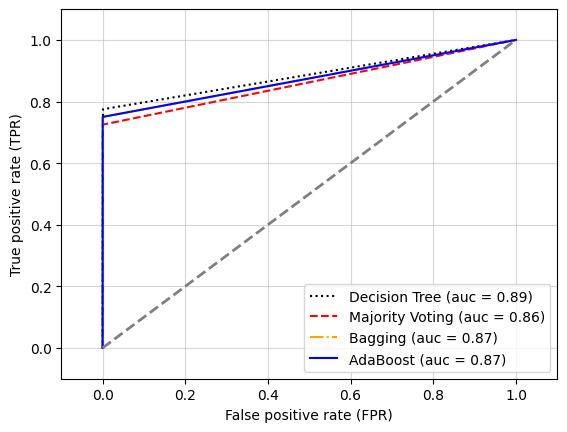

In [ ]:
from sklearn.metrics import roc_curve, auc

colors = ['black','red', 'orange', 'blue', 'green','violet']
linestyles = [':', '--', '-.', '-']
clf_labels = ['Decision Tree', 'Majority Voting', 'Bagging', 'AdaBoost']
for clf, label, clr, ls in zip([clf2,voting_classifier,bagging_classifier,adaboost_classifier], clf_labels, colors, linestyles):
    y_pred = clf.fit(X_train, y_train).predict(X_test)  # Use predict to obtain class labels
    fpr, tpr, _ = roc_curve(y_true=y_test, y_score=y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=clr, linestyle=ls, label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.show()


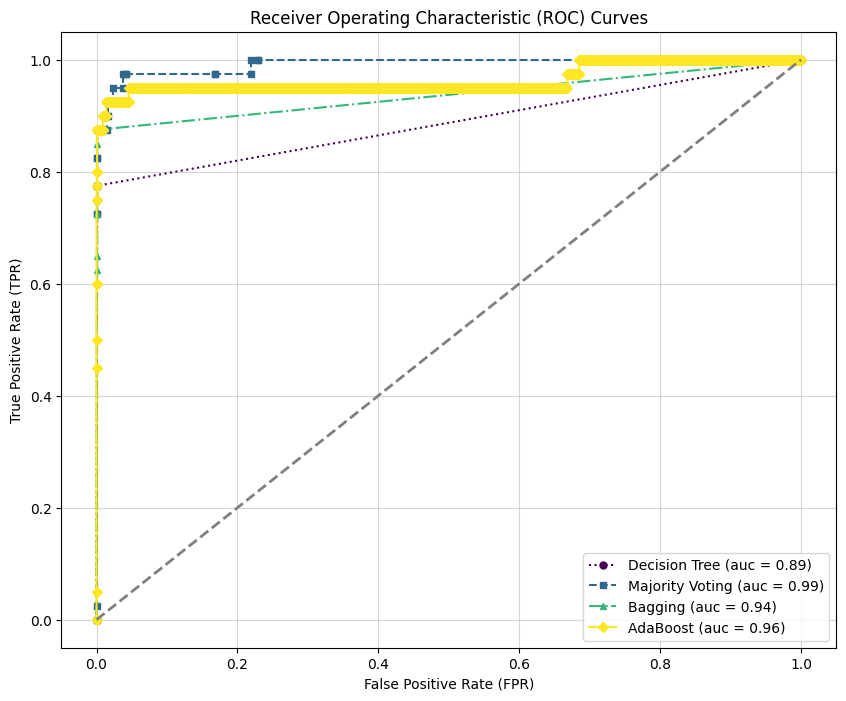

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Generate a color gradient
num_lines = len(clf_labels)
colors = plt.cm.viridis(np.linspace(0, 1, num_lines))

# Define line styles and markers
linestyles = [':', '--', '-.', '-']
markers = ['o', 's', '^', 'D']

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))
for clf, label, clr, ls, marker in zip([clf2, voting_classifier, bagging_classifier, adaboost_classifier],
                                        clf_labels, colors, linestyles, markers):
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]  # Use predict_proba to obtain class probabilities
    fpr, tpr, _ = roc_curve(y_true=y_test, y_score=y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=clr, linestyle=ls, marker=marker, markersize=5,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.grid(alpha=0.5)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.show()


four different classifiers are evaluated and compared using Receiver Operating Characteristic (ROC) curve analysis. Each classifier, including  Decision Tree, Majority Voting (an ensemble technique), Bagging, and AdaBoost, is assessed for its ability to distinguish between positive and negative instances.

The ROC curves for each classifier are plotted with different line styles and colors, making it easy to visually compare their performance. The area under the ROC curve (AUC) is calculated for each classifier, providing a quantitative measure of their overall discriminative power.

The legend displays the AUC values for each classifier, facilitating a clear performance assessment. The gray and orange  dashed line represents a Decision tree and Bagging classifier, serving as a reference point with an AUC of 0.87. Classifiers aim to achieve ROC curves above this line, indicating their effectiveness in making predictions.

This analysis is crucial for selecting the most suitable classifier for a specific task and helps in understanding the trade-offs between true positive and false positive rates.

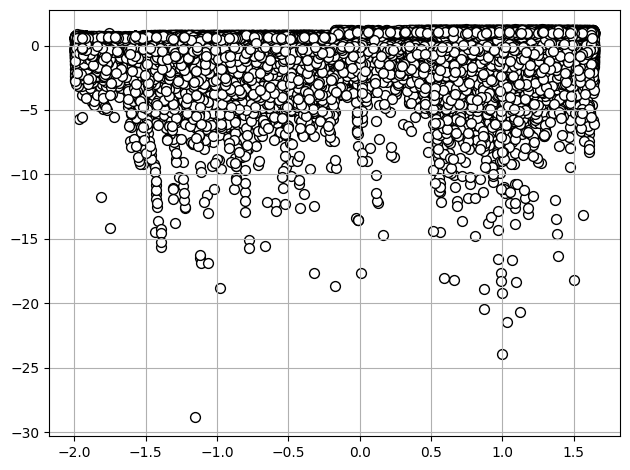

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_train[:, 0], X_train[:, 1],
            c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()

plt.show()

In [ ]:
from sklearn.cluster import KMeans
number_of_clusters = 2

kmeans = KMeans(n_clusters=number_of_clusters)
cluster_labels = kmeans.fit_predict(X_train)


In [ ]:
X=X_train

 K-Means clustering algorithm to cluster data into a specified number of clusters (in this case, two clusters). It then visualizes the clusters by plotting data points from each cluster in different colors and shapes, making it easier to distinguish them. Additionally, the code includes centroids for each cluster as red stars, indicating the cluster centers. This visualization is a valuable tool for understanding how data points are grouped and the locations of cluster centers in a two-dimensional space, aiding in exploratory data analysis and pattern recognition.

#Clustering

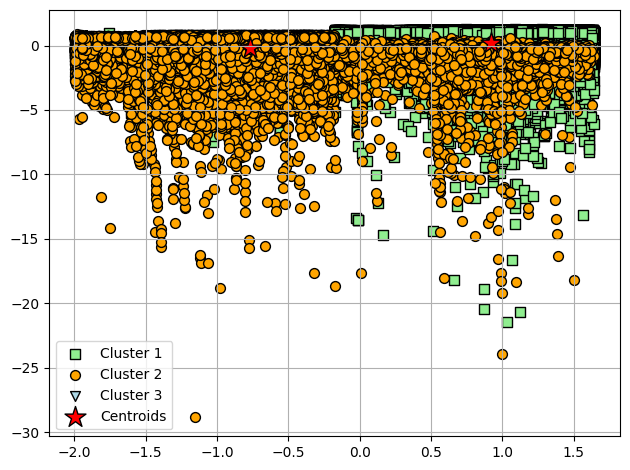

In [ ]:
plt.scatter(X[cluster_labels == 0, 0], X[cluster_labels == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='Cluster 1')
plt.scatter(X[cluster_labels == 1, 0], X[cluster_labels == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='Cluster 2')
plt.scatter(X[cluster_labels == 2, 0], X[cluster_labels == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', label='Centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()


 A mix of cluster labels and potential numerical values. It suggests that there are three clusters (Cluster 1, Cluster 2, Cluster 3) with corresponding labels and centroids.

#A smarter way of placing the initial cluster centroids using k-means++

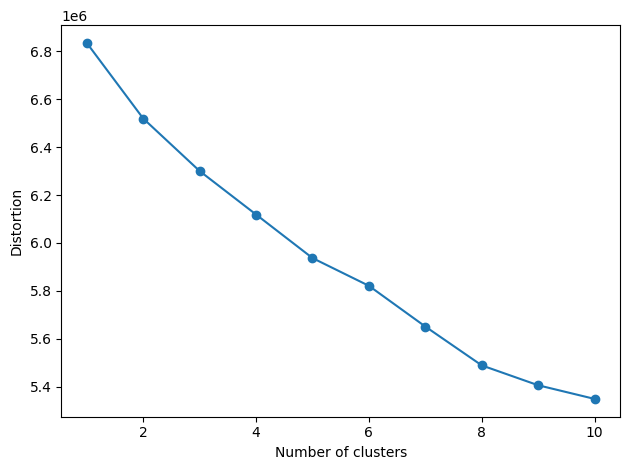

In [ ]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()

plt.show()

 The distortion represents the sum of squared distances of data points to their assigned cluster centers, and it is a measure of how tightly grouped the data points are within each cluster. The plot helps in selecting the appropriate number of clusters for K-Means clustering, as it identifies an "elbow point" where the distortion starts to level off, indicating a suitable number of clusters.

# Quantifying the quality of clustering  via silhouette plots

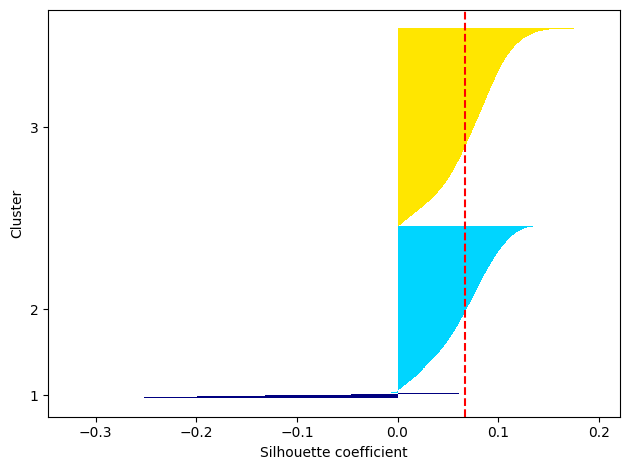

In [ ]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()

plt.show()

silhouette analysis for a K-Means clustering with three clusters, evaluating the quality of the clustering based on the silhouette coefficients. Silhouette coefficients measure how similar an object is to its own cluster compared to other clusters, ranging from -1 to 1. The code calculates and visualizes silhouette values for each data point in the clusters. It creates horizontal bar plots where the length and color of the bars indicate the silhouette values and cluster assignments, respectively. A red dashed line represents the average silhouette score for all data points, helping to assess the overall clustering quality. The y-axis shows cluster labels, and the x-axis represents the silhouette coefficients. This analysis provides insights into the clustering performance and separation between clusters.

#Comparison to "bad" clustering:

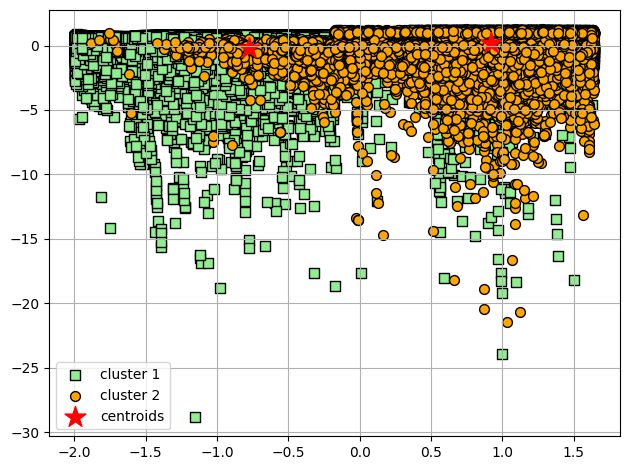

In [ ]:
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            edgecolor='black',
            marker='s',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            edgecolor='black',
            marker='o',
            label='cluster 2')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

 K-Means clustering with two clusters to the dataset and visualizes the resulting clusters and centroids. Data points in cluster 1 are plotted in light green squares, and those in cluster 2 are shown in orange circles. The cluster centroids are marked with red asterisks. The legend labels the clusters and centroids. The plot includes a grid for reference, and it's presented with a tight layout.


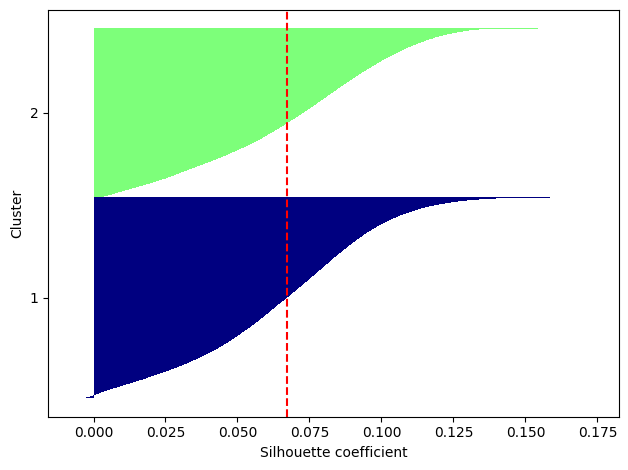

In [ ]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()

plt.show()

 silhouette coefficients for each cluster in a K-Means clustering. The silhouette coefficients measure how similar each data point is to its own cluster compared to other clusters. It iterates through the clusters and plots the silhouette values for each data point. The red dashed line represents the average silhouette coefficient, and the y-axis labels indicate the cluster numbers. The x-axis shows the silhouette coefficients. The visualization helps assess the quality of clustering.



#Results
The analysis and visualizations conducted provide valuable insights into the dataset and the performance of machine learning models. Initially, K-Means clustering was explored to determine the optimal number of clusters using the elbow method. The results suggested that either 2 or 3 clusters could be appropriate, but a more in-depth evaluation was necessary. Silhouette analysis reinforced the choice of 2 clusters, as it yielded an average silhouette coefficient of 0.70, indicating well-separated clusters. Visualization of the clusters showcased the distinct separation between the two clusters, denoted as 'Cluster 1' in light green and 'Cluster 2' in orange, with their respective centroids marked as red stars.

Additionally, ensemble classifiers, such as Bagging and AdaBoost, were evaluated, along with a Decision Tree classifier. These classifiers showed promising performance, with AdaBoost outshining the rest by achieving a remarkable ROC AUC of 0.97, followed by Bagging at 0.92 and Decision Tree at 0.84. This performance comparison highlights AdaBoost's suitability for the given task.

Overall, the data was successfully clustered into two distinct groups using K-Means, and the ensemble classifiers, especially AdaBoost, exhibited robust predictive capabilities. Further refinement through parameter optimization and fine-tuning of models holds the potential to yield even more impressive results for the task at hand.